In [12]:
library(caret)
library(ggplot2)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [1]:
df <- read.csv("glass.csv")

In [2]:
head(df)

RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0,0.00,1
1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0,0.00,1
1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0,0.00,1
1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0,0.00,1
1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0,0.00,1
1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0,0.26,1


In [3]:
summary(df)

       RI              Na              Mg              Al       
 Min.   :1.511   Min.   :10.73   Min.   :0.000   Min.   :0.290  
 1st Qu.:1.517   1st Qu.:12.91   1st Qu.:2.115   1st Qu.:1.190  
 Median :1.518   Median :13.30   Median :3.480   Median :1.360  
 Mean   :1.518   Mean   :13.41   Mean   :2.685   Mean   :1.445  
 3rd Qu.:1.519   3rd Qu.:13.82   3rd Qu.:3.600   3rd Qu.:1.630  
 Max.   :1.534   Max.   :17.38   Max.   :4.490   Max.   :3.500  
       Si              K                Ca               Ba       
 Min.   :69.81   Min.   :0.0000   Min.   : 5.430   Min.   :0.000  
 1st Qu.:72.28   1st Qu.:0.1225   1st Qu.: 8.240   1st Qu.:0.000  
 Median :72.79   Median :0.5550   Median : 8.600   Median :0.000  
 Mean   :72.65   Mean   :0.4971   Mean   : 8.957   Mean   :0.175  
 3rd Qu.:73.09   3rd Qu.:0.6100   3rd Qu.: 9.172   3rd Qu.:0.000  
 Max.   :75.41   Max.   :6.2100   Max.   :16.190   Max.   :3.150  
       Fe               Type     
 Min.   :0.00000   Min.   :1.00  
 1st Qu.

In [4]:
df$Type <- as.factor(df$Type)

In [6]:
df_1 <- sort(sample(nrow(df),nrow(df)*0.7))

In [7]:
train_df <- df[df_1,]
test_df <- df[-df_1,]

In [8]:
dim(train_df)
dim(test_df)

[1] 149  10

[1] 65 10

In [10]:
table(train_df$Type)


 1  2  3  5  6  7 
49 52  7  9  8 24 

In [13]:
trctrl <- trainControl(method = "repeatedcv", number = 10, repeats = 3)

In [21]:
knn <- (knn_fit <- train(Type ~., data = train_df, method = "knn",
                 trControl=trctrl,
                 preProcess = c("center", "scale"),
                 tuneLength = 15))

In [22]:
knn

k-Nearest Neighbors 

149 samples
  9 predictor
  6 classes: '1', '2', '3', '5', '6', '7' 

Pre-processing: centered (9), scaled (9) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 134, 133, 135, 135, 133, 135, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   5  0.6781871  0.5495770
   7  0.6674948  0.5339424
   9  0.6426128  0.4963607
  11  0.6308646  0.4795903
  13  0.6186901  0.4598918
  15  0.6200347  0.4564015
  17  0.6153008  0.4489661
  19  0.6124320  0.4430787
  21  0.6039516  0.4301547
  23  0.5928008  0.4124543
  25  0.5907373  0.4063759
  27  0.5792446  0.3885476
  29  0.5721754  0.3794303
  31  0.5679889  0.3732079
  33  0.5787276  0.3895722

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 5.

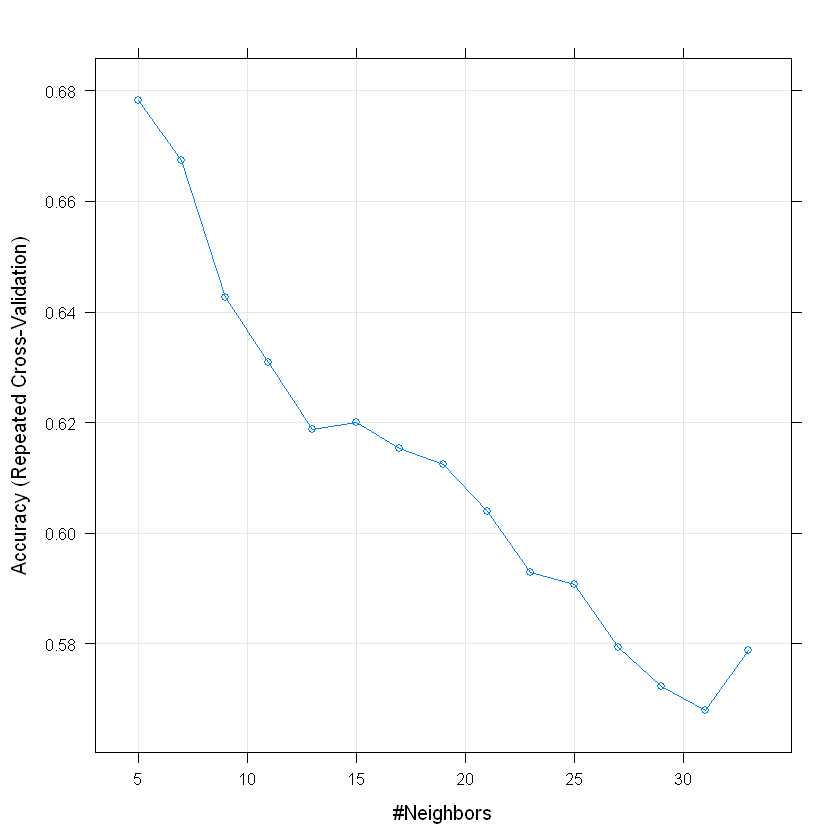

In [23]:
plot(knn)

In [24]:
test_pred <- predict(knn, test_df)

In [26]:
confusionMatrix(test_pred, test_df$Type)

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3  5  6  7
         1 15  3  5  0  0  0
         2  6 20  5  1  0  1
         3  0  0  0  0  0  0
         5  0  0  0  2  0  0
         6  0  1  0  0  1  0
         7  0  0  0  1  0  4

Overall Statistics
                                          
               Accuracy : 0.6462          
                 95% CI : (0.5177, 0.7608)
    No Information Rate : 0.3692          
    P-Value [Acc > NIR] : 5.463e-06       
                                          
                  Kappa : 0.4871          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 5 Class: 6 Class: 7
Sensitivity            0.7143   0.8333   0.0000  0.50000  1.00000  0.80000
Specificity            0.8182   0.6829   1.0000  1.00000  0.98438  0.98333
Pos Pred Value         0.6522   0.6061      NaN  1.00000  0.50000  0.80000
Neg Pred Value

In [28]:
mean(test_pred==test_df$Type)

[1] 0.6461538